## Importing the required libraries for EDA

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Loading the data into the data frame.

In [70]:
data = pd.read_csv("cardataset\data.csv") # Replace with your dataset.

In [71]:
# To display the top 5 rows 
data.head(5)   

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [72]:
data.tail(5)                        # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [73]:
## Checking the types of data
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Dropping irrelevant columns (if you have in your dataset)

In [74]:
data = data.drop(['Make', 'Model' ,'Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
data.head(5)

,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Dropping the duplicate rows (if there in your dataset)

In [75]:
data.shape

(11914, 8)

### Checking if you have duplicate rows in your dataset

In [76]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1094, 8)


In [77]:
data = data.drop_duplicates()
data.shape
# Reduced after removing duplicates

(10820, 8)

# Making A corealtion HeatMap

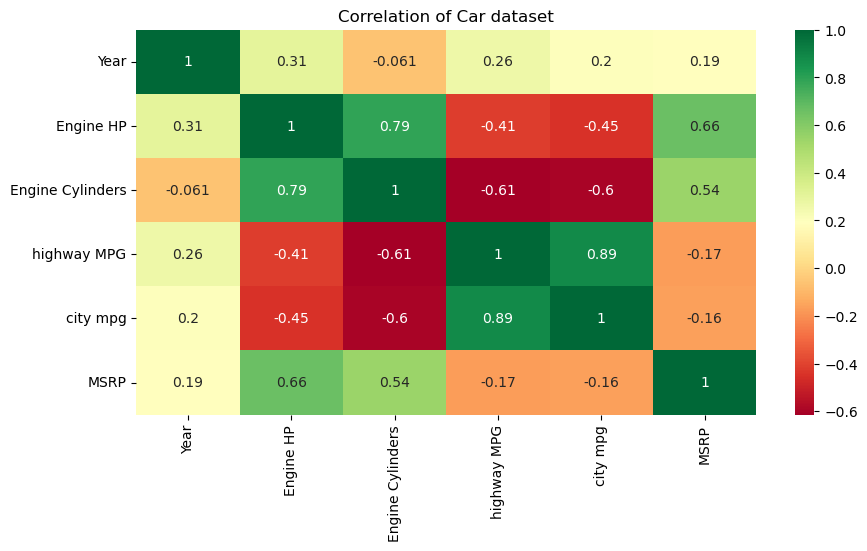

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number']) 

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot= True, cmap='RdYlGn')
plt.title("Correlation of Car dataset")
plt.show()

# Select features and target

In [79]:
data.shape

(10820, 8)

In [80]:
# Separate Features and Target
X = data.drop("MSRP", axis=1) # Replace with the target (label) of your own dataset 
y = data["MSRP"]

print(X.shape, y.shape) # print the number of data instances and the attribues

(10820, 7) (10820,)


# Identify Numerical and Categorical Features

In [81]:
# get the column names of the numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns 
# get the column names of the categorical features (if any in your dataset else ignore)
categorical_features = X.select_dtypes(include=['object']).columns 

print("Numerical Features\n",numerical_features, "Shape: ", numerical_features.shape)
print("Categorical Features\n",categorical_features, "Shape: ", categorical_features.shape)

Numerical Features
 Index(['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg'], dtype='object') Shape:  (5,)
Categorical Features
 Index(['Transmission Type', 'Driven_Wheels'], dtype='object') Shape:  (2,)


## Preprocessing 
### Treating missing values using imputation 
### and scaling to standarized the values

In [82]:
# Numerical Features
imputer_num = SimpleImputer(strategy='mean')
X[numerical_features] = imputer_num.fit_transform(X[numerical_features])
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
print("X Shape: ", X.shape)

X Shape:  (10820, 7)


In [83]:
# Categorical Features
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_features] = imputer_cat.fit_transform(X[categorical_features])
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))


In [84]:
print("X_Encoded Shape: ", X_encoded.shape)

X_Encoded Shape:  (10820, 9)


In [85]:
X_encoded.columns = encoder.get_feature_names_out(categorical_features)
# X_encoded
# print("X_Encoded Shape: ", X_encoded.shape, "X Shape: ", X.shape)

### Combining both numerical and categorical again to single set X

In [86]:
X_new = X.drop(categorical_features, axis=1)
print("X_new Shape: ", X_new.shape)

X_new Shape:  (10820, 5)


In [87]:
X_Comb = pd.concat([pd.DataFrame(X_new.values), pd.DataFrame(X_encoded.values)], axis=1)
X_Comb.head(5)
print("X Comb Shape: ", X_Comb.shape)

X Comb Shape:  (10820, 14)


In [88]:
X_Comb.head()

,0,1,2,3,4,0,1,2,3,4,5,6,7,8
0,-0.002456,0.731368,0.186611,-0.076343,-0.086193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.002456,0.411494,0.186611,0.144697,-0.086193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.002456,0.411494,0.186611,0.144697,0.021486,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.002456,-0.228254,0.186611,0.144697,-0.193872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.002456,-0.228254,0.186611,0.144697,-0.193872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Split data into training and testing sets

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_Comb, y, test_size=0.2, random_state=42)

# Train and Evaluate the Models

In [90]:
# Creating a dictionary of models 
models = {
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "SVM": SVR(),
    }

In [91]:
# iterate each model presented in above dict to traning and evaluation and save the results in results list
results = []
for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Model": name,
            "MSE": mse,
            "MAE": mae,
            "R-squared": r2
        })

        print(f"Model: {name}")
        print(f"  MSE: {mse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  R-squared: {r2:.4f}")
        print("-" * 30)

Model: Decision Tree
  MSE: 1027102447.3364
  MAE: 5867.6256
  R-squared: 0.8137
------------------------------
Model: Random Forest
  MSE: 995389815.9996
  MAE: 5457.8350
  R-squared: 0.8195
------------------------------
Model: SVM
  MSE: 5669052285.0735
  MAE: 24252.6666
  R-squared: -0.0282
------------------------------


# Display Results Summary

In [92]:

results_df = pd.DataFrame(results)
print("\n--- Regression Model Results ---")
print(results_df)


--- Regression Model Results ---
           Model           MSE           MAE  R-squared
0  Decision Tree  1.027102e+09   5867.625560   0.813710
1  Random Forest  9.953898e+08   5457.834978   0.819462
2            SVM  5.669052e+09  24252.666639  -0.028219
